In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix,ConfusionMatrixDisplay ,roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV ,KFold,cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go

# **Importing the Dataset**

In [2]:
train = pd.read_csv("/content/SalaryData_Train(1).csv")
test=pd.read_csv("/content/SalaryData_Test(1).csv")

In [3]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# **Problem Statement :**

* Prepare a classification model using SVM for salary data 



# **Dataset Description :**

1. age -- age of a person
2. workclass	-- A work class is a grouping of work 
3. education	-- Education of an individuals	
4. maritalstatus -- Marital status of an individulas	
5. occupation	 -- occupation of an individuals
6. relationship -- 	relationship of an individuals
7. race --  Race of an Individual
8. sex --  Gender of an Individual
9. capitalgain --  profit received from the sale of an investment	
10. capitalloss	-- A decrease in the value of a capital asset
11. hoursperweek -- number of hours work per week	
12. native -- Native of an individual
13. Salary -- salary of an individual


In [5]:
def lab_encode(df,column):
    label_encoder = preprocessing.LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    return df

In [6]:
# function to perform one hot encoding
def one_hot_encoder(df,columns):
    ohe=OneHotEncoder(handle_unknown="ignore", sparse=False)
    for i in columns:
        x=pd.DataFrame(ohe.fit_transform(df[[i]]), columns=df[i].unique())
        df = pd.concat([x,df], axis=1, join="inner").drop(i,axis=1)
    return df

In [7]:
# function for scaling the data
def minmax_scaler(df):
    scaler = MinMaxScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns, index=df.index)
    return df

# Train

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30161.0,38.438115,13.134830,17.0,28.0,37.0,47.0,90.0
educationno,30161.0,10.121316,2.550037,1.0,9.0,10.0,13.0,16.0
capitalgain,30161.0,1092.044064,7406.466611,0.0,0.0,0.0,0.0,99999.0
capitalloss,30161.0,88.302311,404.121321,0.0,0.0,0.0,0.0,4356.0
hoursperweek,30161.0,40.931269,11.980182,1.0,40.0,40.0,45.0,99.0


In [10]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
train.agg(["skew","kurt"])

,age,educationno,capitalgain,capitalloss,hoursperweek
skew,0.53018,-0.305378,11.902483,4.528238,0.330856
kurt,-0.14476,0.643605,153.661174,19.529284,3.167683


In [12]:
for i in train.columns :
    print(i , '\n', train[i].value_counts())

age 
 36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64
workclass 
  Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
education 
  HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
educationno 
 9     9840
10    6677
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: educationno, dtype: int64
m

In [13]:
for i in train.columns:
    print(i , "\n" , train[i].unique())

age 
 [39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86]
workclass 
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
educationno 
 [13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]
maritalstatus 
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation 
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-ho

In [14]:
# find categorical and numeric variables

categorical = [var for var in train.columns if train[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n', categorical)
print('\n')
numeric = [var for var in train.columns if train[var].dtype!='O']
print('There are {} Numeric variables\n'.format(len(numeric)))
print('The Numeric variables are :\n', numeric)

There are 9 categorical variables

The categorical variables are :
 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


There are 5 Numeric variables

The Numeric variables are :
 ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


## **Visualization**

Skew: 0.5301804771730516
Kurtosis: -0.14475966878549817


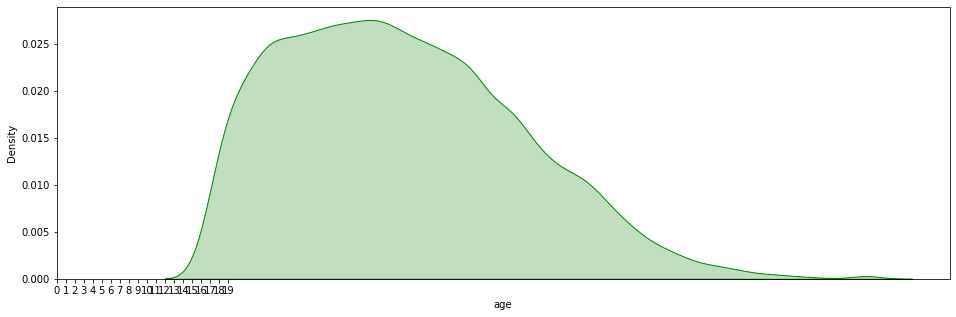

Skew: -0.305378355820322
Kurtosis: 0.643604835875955


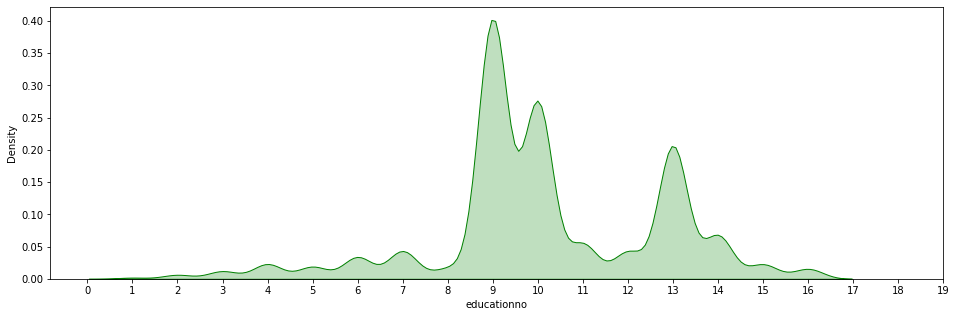

Skew: 11.902482731802463
Kurtosis: 153.6611743759967


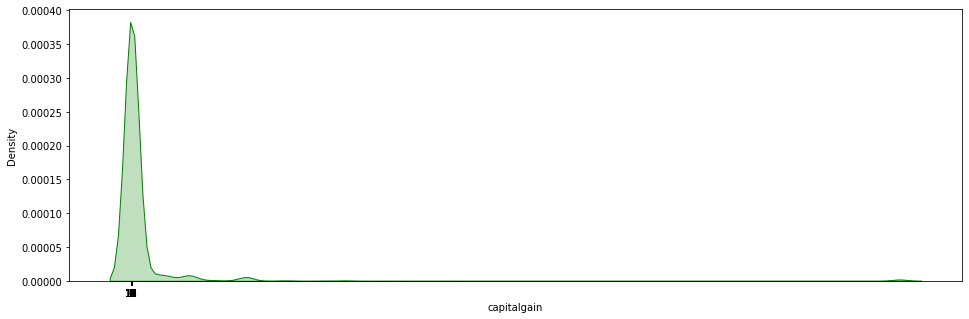

Skew: 4.528238416771532
Kurtosis: 19.529283558200333


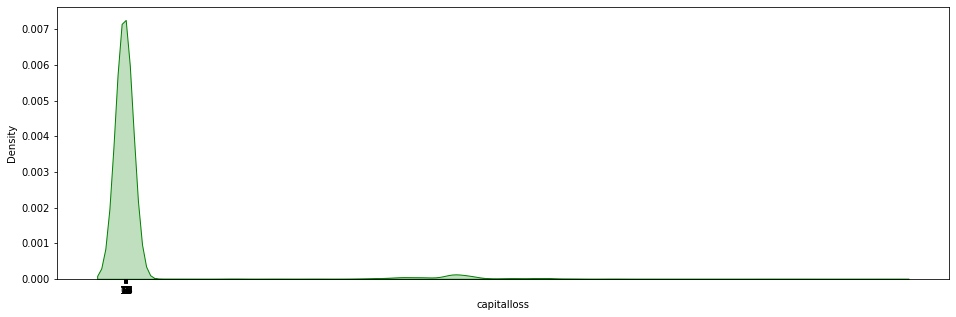

Skew: 0.3308562028636332
Kurtosis: 3.167682631106674


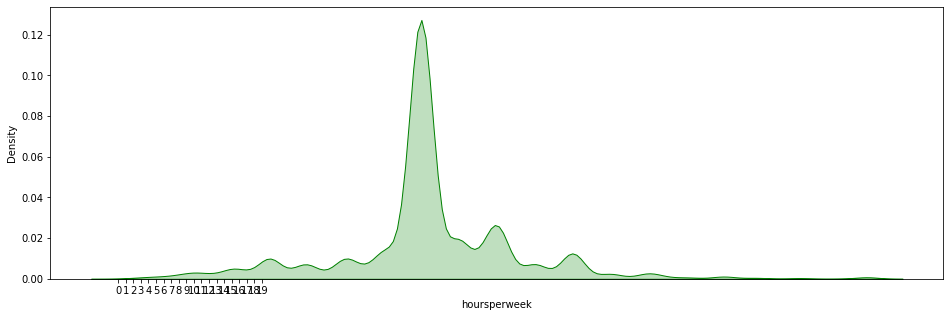

In [15]:
for i in numeric:
  plt.figure(figsize=(16,5))
  print("Skew: {}".format(train[i].skew()))
  print("Kurtosis: {}".format(train[i].kurtosis()))
  ax = sns.kdeplot(train[i],shade=True,color='g')
  plt.xticks([i for i in range(0,20,1)])
  plt.show()


<Figure size 432x288 with 0 Axes>

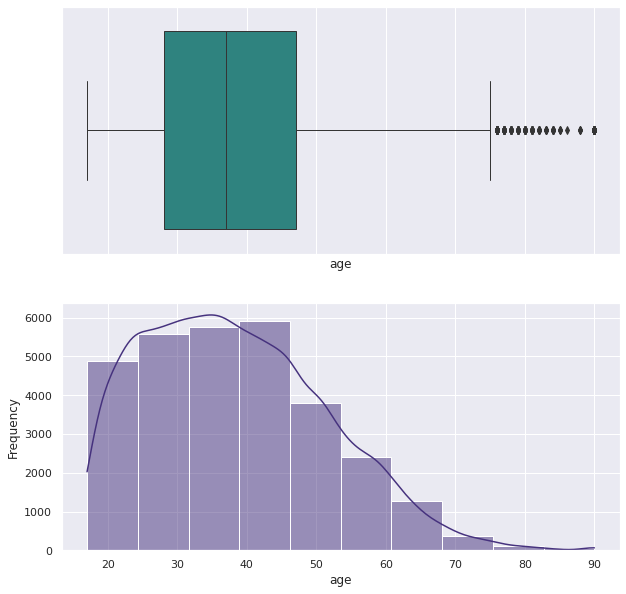

<Figure size 720x720 with 0 Axes>

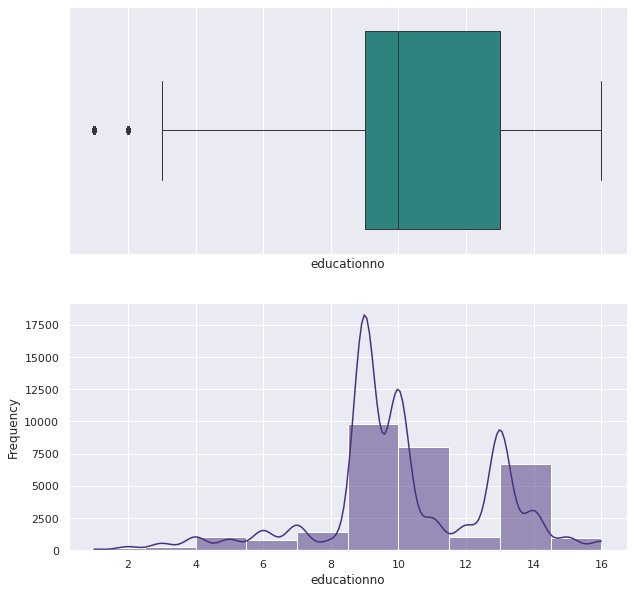

<Figure size 720x720 with 0 Axes>

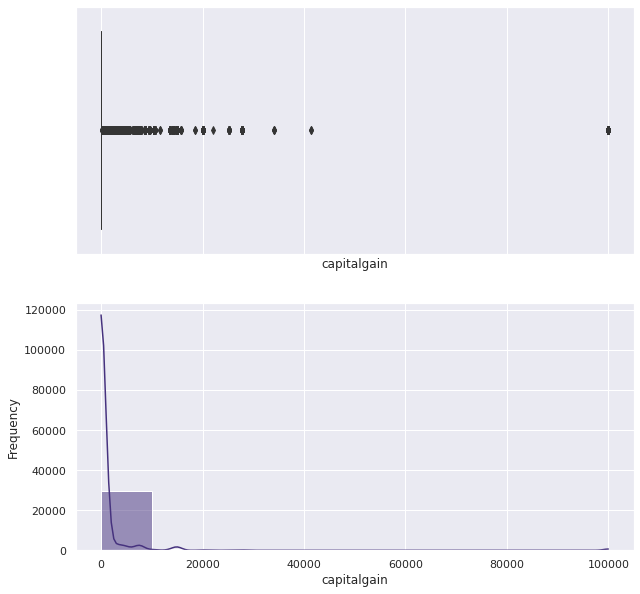

<Figure size 720x720 with 0 Axes>

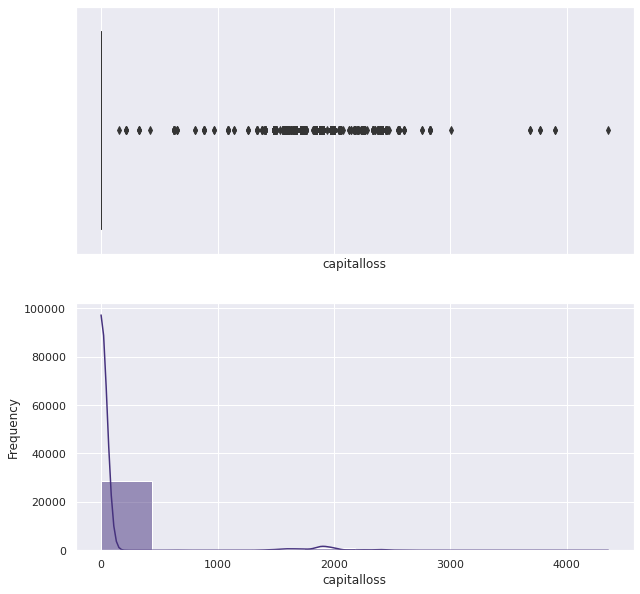

<Figure size 720x720 with 0 Axes>

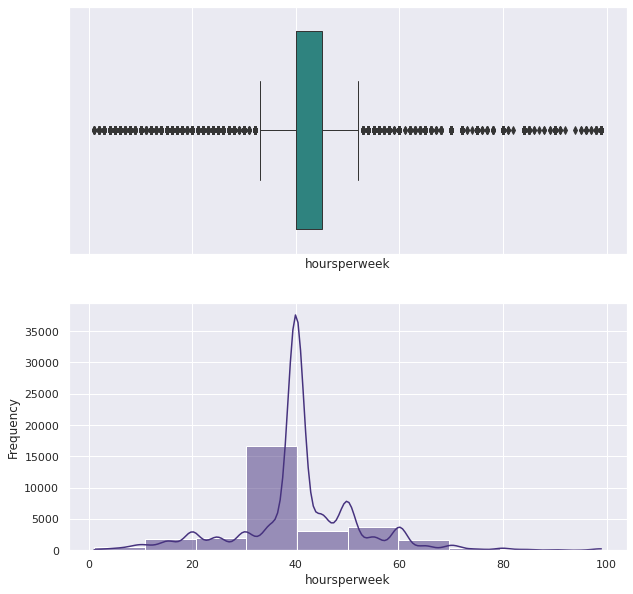

In [16]:
for i in numeric:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(10, 10)}, palette="viridis")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(train[i], ax=ax_box , linewidth= 1.0, palette="viridis")
    sns.histplot(train[i], ax=ax_hist , bins = 10,kde=True, palette="viridis")

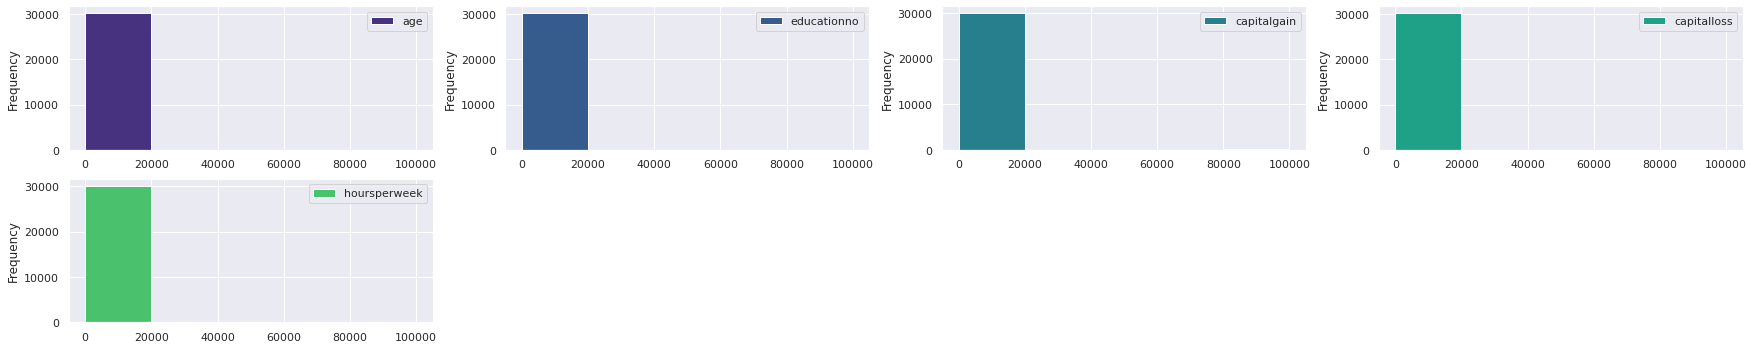

In [17]:
plt.rcParams['figure.figsize']=(30,28)
train.plot(kind='hist', bins=5, subplots=True, layout=(9,4), sharex=False, sharey=False)
plt.show()

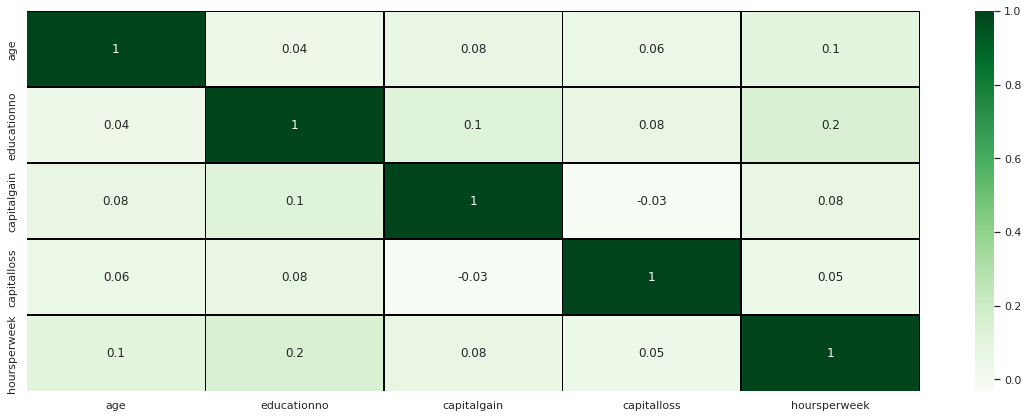

In [18]:
plt.figure(figsize=(20,7))
# plotting correlation heatmap
dataplot = sns.heatmap(train.corr(), cmap="Greens", annot=True, linecolor='black', linewidths=0.5, fmt='.1g')
  
# displaying heatmap
plt.show()

# Test Data

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [20]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15060.0,38.768327,13.380676,17.0,28.0,37.0,48.0,90.0
educationno,15060.0,10.112749,2.558727,1.0,9.0,10.0,13.0,16.0
capitalgain,15060.0,1120.301594,7703.181842,0.0,0.0,0.0,0.0,99999.0
capitalloss,15060.0,89.041899,406.283245,0.0,0.0,0.0,0.0,3770.0
hoursperweek,15060.0,40.951594,12.062831,1.0,40.0,40.0,45.0,99.0


In [21]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [22]:
test.agg(["skew","kurt"])

,age,educationno,capitalgain,capitalloss,hoursperweek
skew,0.536112,-0.320999,11.570156,4.496738,0.359502
kurt,-0.181312,0.618468,143.591390,19.080685,3.267311


In [23]:
for i in test.columns :
    print(i , '\n', test[i].value_counts())

age 
 35    444
33    442
36    431
31    423
38    420
     ... 
85      2
88      2
89      1
87      1
84      1
Name: age, Length: 73, dtype: int64
workclass 
  Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64
education 
  HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64
educationno 
 9     4943
10    3221
13    2526
14     887
11     652
7      571
12     499
6      403
4      266
15     243
5      221
8      200
16     169
3      161
2       71
1       27
Name: educationno, dtype: int64
m

In [24]:
for i in test.columns:
    print(i , "\n" , test[i].unique())

age 
 [25 38 28 44 34 63 24 55 65 36 26 48 43 20 37 45 22 23 54 32 46 56 17 29
 39 52 18 21 42 33 30 47 41 19 69 50 31 59 49 58 40 27 57 61 51 73 53 80
 62 35 72 64 68 66 60 67 71 70 90 77 81 74 78 82 75 85 76 89 83 79 88 87
 84]
workclass 
 [' Private' ' Local-gov' ' Self-emp-not-inc' ' Federal-gov' ' State-gov'
 ' Self-emp-inc' ' Without-pay']
education 
 [' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' 5th-6th' ' Assoc-voc' ' 9th'
 ' Doctorate' ' 12th' ' 1st-4th' ' Preschool']
educationno 
 [ 7  9 12 10  6 15  4 13 14  3 11  5 16  8  2  1]
maritalstatus 
 [' Never-married' ' Married-civ-spouse' ' Widowed' ' Separated'
 ' Divorced' ' Married-spouse-absent' ' Married-AF-spouse']
occupation 
 [' Machine-op-inspct' ' Farming-fishing' ' Protective-serv'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-support' ' Sales' ' Priv-house-serv'
 ' Transport-moving' ' Handlers-cleaners' ' 

In [25]:
# find categorical and numeric variables

categorical = [var for var in test.columns if test[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n', categorical)
print('\n')
numeric = [var for var in test.columns if test[var].dtype!='O']
print('There are {} Numeric variables\n'.format(len(numeric)))
print('The Numeric variables are :\n', numeric)

There are 9 categorical variables

The categorical variables are :
 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


There are 5 Numeric variables

The Numeric variables are :
 ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


## **Visualization**

Skew: 0.536111791886582
Kurtosis: -0.18131221328382807


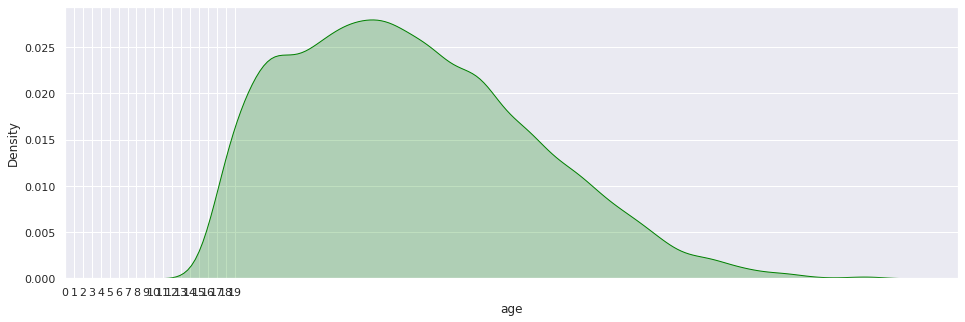

Skew: -0.32099937243135945
Kurtosis: 0.6184678428156434


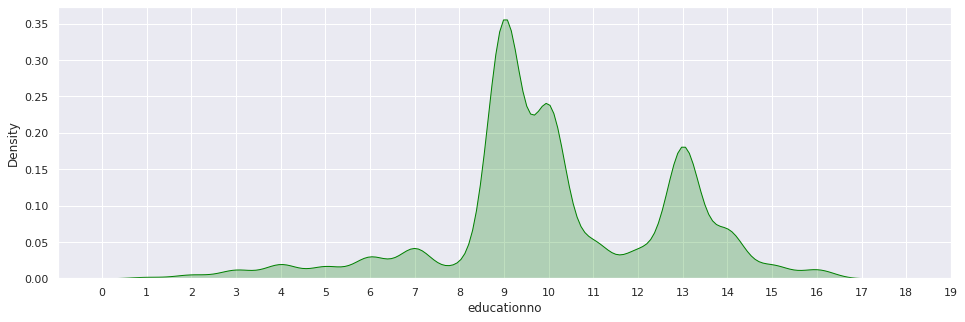

Skew: 11.570156200574004
Kurtosis: 143.59139014149105


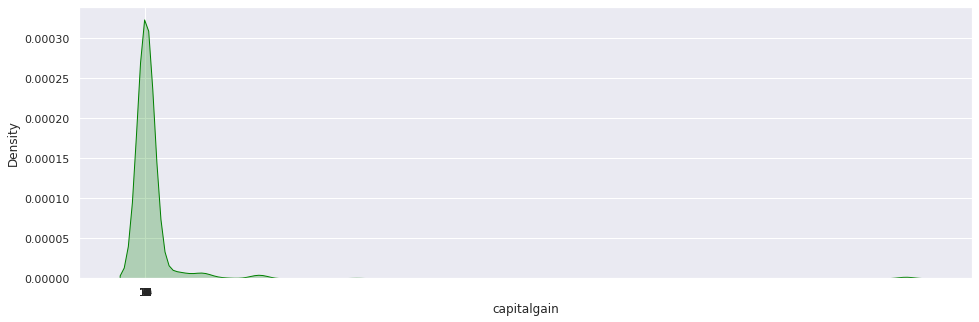

Skew: 4.496738424623098
Kurtosis: 19.08068507476673


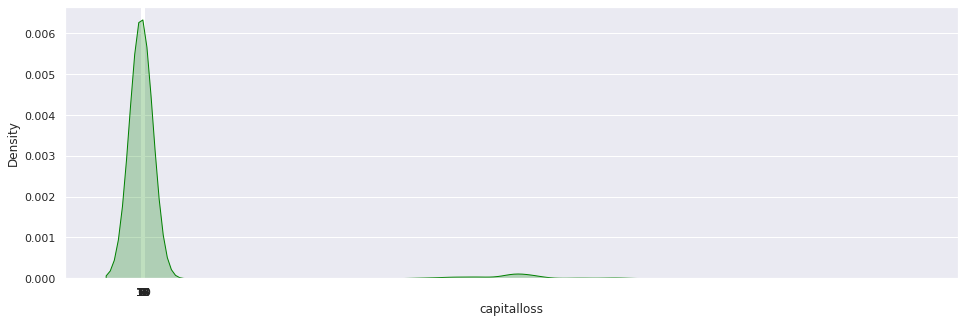

Skew: 0.3595017564605269
Kurtosis: 3.26731065345459


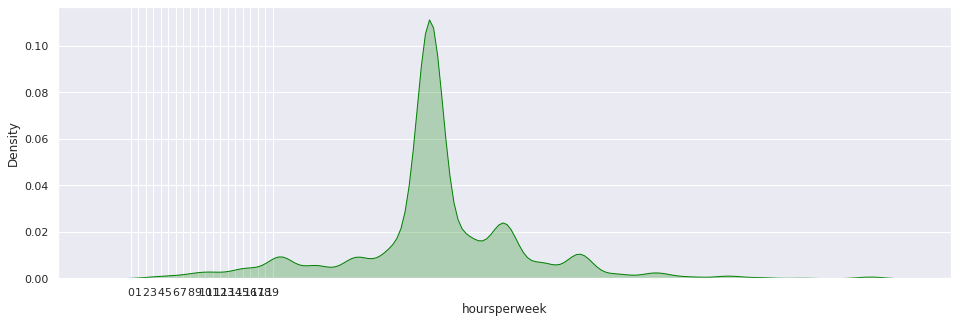

In [26]:
for i in numeric:
  plt.figure(figsize=(16,5))
  print("Skew: {}".format(test[i].skew()))
  print("Kurtosis: {}".format(test[i].kurtosis()))
  ax = sns.kdeplot(test[i],shade=True,color='g')
  plt.xticks([i for i in range(0,20,1)])
  plt.show()


<Figure size 2160x2016 with 0 Axes>

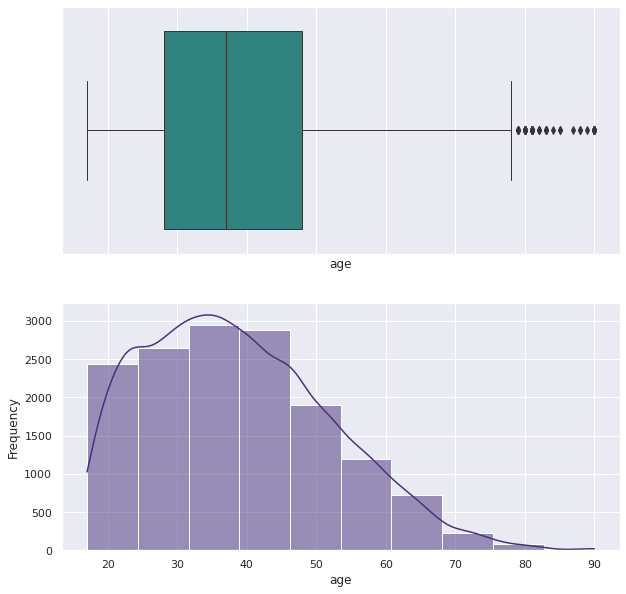

<Figure size 720x720 with 0 Axes>

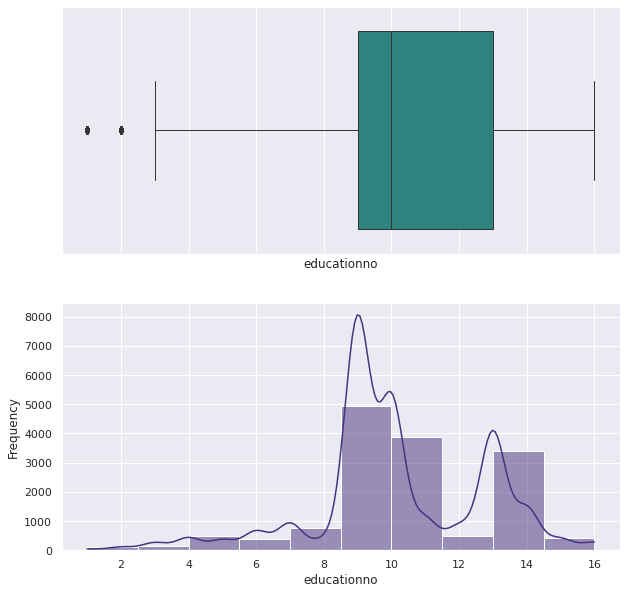

<Figure size 720x720 with 0 Axes>

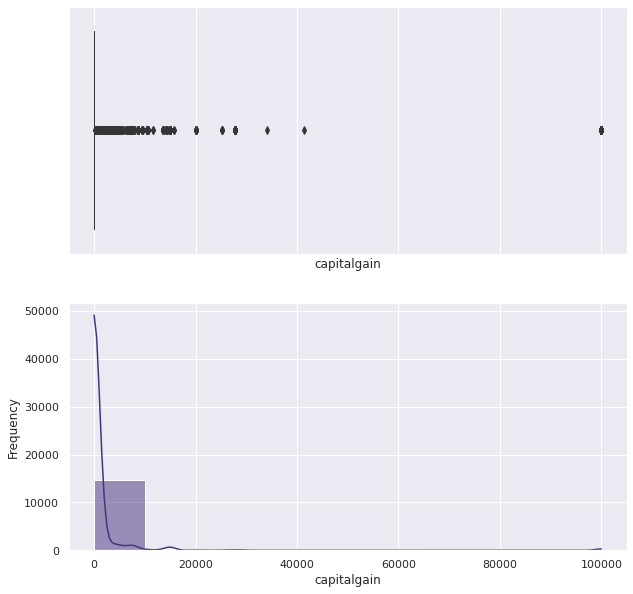

<Figure size 720x720 with 0 Axes>

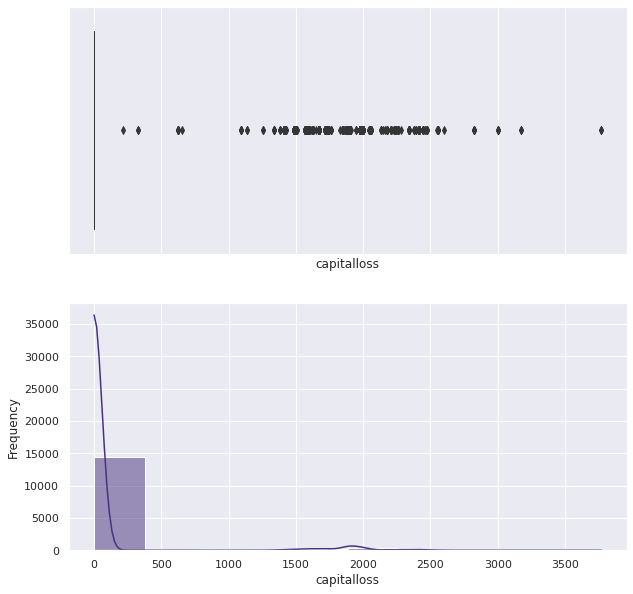

<Figure size 720x720 with 0 Axes>

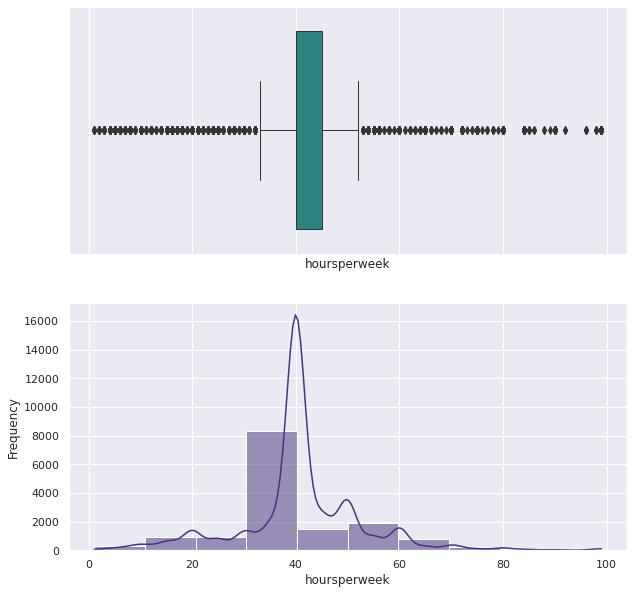

In [27]:
for i in numeric:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(10, 10)}, palette="viridis")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(test[i], ax=ax_box , linewidth= 1.0, palette="viridis")
    sns.histplot(test[i], ax=ax_hist , bins = 10,kde=True, palette="viridis")

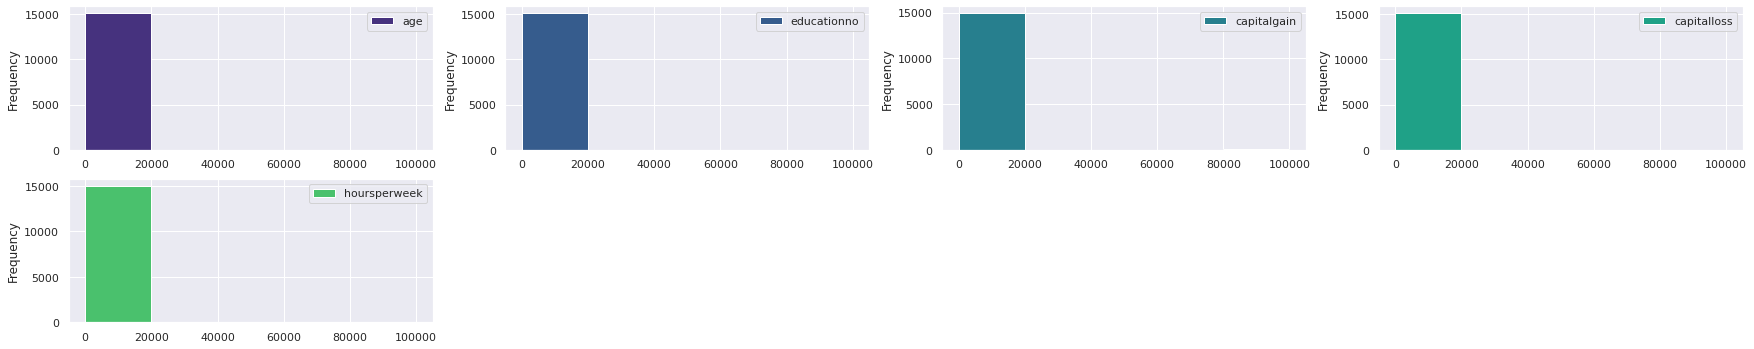

In [28]:
plt.rcParams['figure.figsize']=(30,28)
test.plot(kind='hist', bins=5, subplots=True, layout=(9,4), sharex=False, sharey=False)
plt.show()

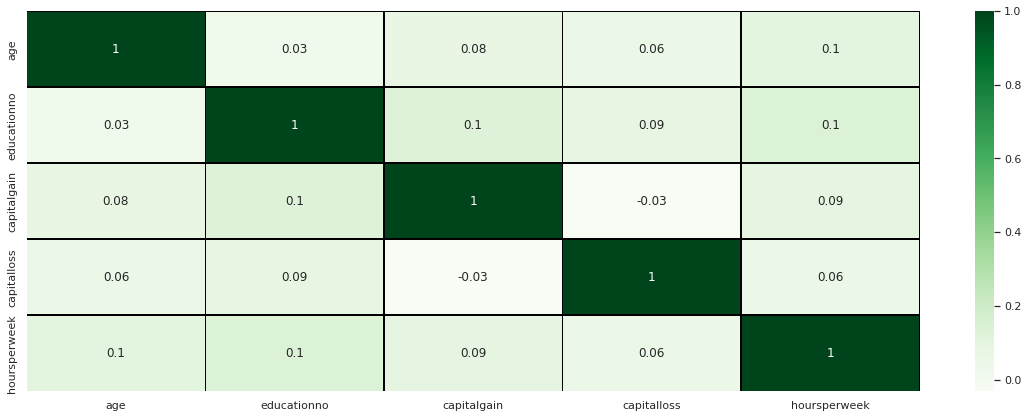

In [29]:
plt.figure(figsize=(20,7))
# plotting correlation heatmap
dataplot = sns.heatmap(test.corr(), cmap="Greens", annot=True, linecolor='black', linewidths=0.5, fmt='.1g')
  
# displaying heatmap
plt.show()

# Support Vector Machine

## Encoding Dependent Variable (y)

In [30]:
#encoding y variable
train = lab_encode(train,"Salary")
test = lab_encode(test,"Salary")

## Splitting into training and testing

In [31]:
x_train = train.drop(["Salary","native"],axis=1)
y_train = train["Salary"]

x_test = test.drop(["Salary","native"],axis=1)
y_test = test["Salary"]


## Encoding Independent Variable (x)

In [32]:
columns=['workclass', 'education','maritalstatus','occupation', 'relationship', 'race', 'sex']
x_train = one_hot_encoder(x_train,columns)
x_test = one_hot_encoder(x_test,columns)

## Scalling Data - MinMax Scaler

In [33]:
x_train = minmax_scaler(x_train)
x_test = minmax_scaler(x_test)

## Ploting Dependent Variable

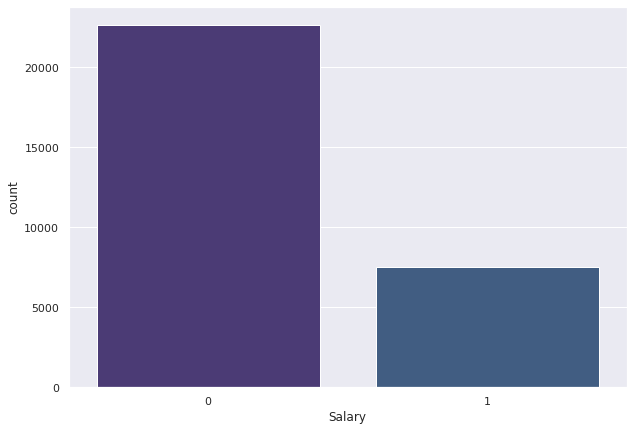

In [34]:
plt.figure(figsize=(10,7))
sns.countplot(train["Salary"])
plt.show()

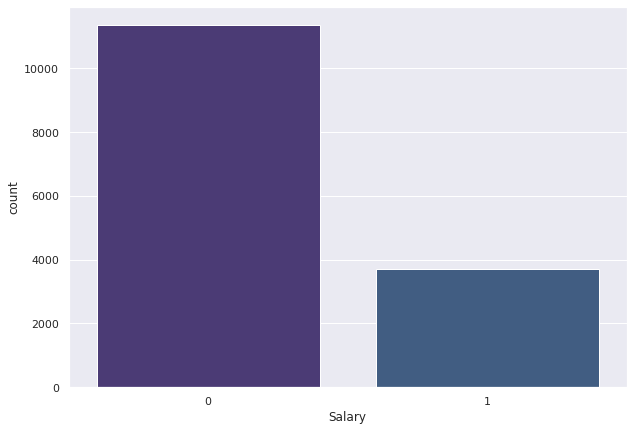

In [35]:
plt.figure(figsize=(10,7))
sns.countplot(test["Salary"])
plt.show()

* from the plot, we see that the data is imbalance
* to convert imbalnce data into balance, we will use Over-Sampling Method-SMOTE

# SMOTE

In [36]:
import imblearn
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(random_state=42)
x_train, y_train = over_sampler.fit_resample(x_train, y_train)
x_test, y_test = over_sampler.fit_resample(x_test, y_test)

In [37]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(22720, 62)
(45306, 62)
(22720,)
(45306,)


## **Grid-Search - Tunning Parameters**


In [38]:
# function to find the best parameters using GridSearchCV
# param_grid = [{"kernel" : ['linear', 'poly', 'rbf', 'sigmoi'],
#                'C':np.geomspace(1e-3, 1e3, 7).tolist(), 'gamma': np.geomspace(1e-2, 1e1, 7).tolist()}]    
# gsv = GridSearchCV(SVC( random_state=42), param_grid, verbose = 300)
# gsv.fit(x_train,y_train)

In [39]:
# print(gsv.best_score_ ,'\n',"\n" , gsv.best_params_)


In [ ]:
kernel=['linear','rbf']
c = [0.1,10,100]
for x in kernel:
    acc = []
    for i in c:
        model = SVC(C =i, kernel= x, random_state=42, gamma=0.5)
        model.fit(x_train, y_train)
        train=model.score(x_train, y_train)
        test=model.score(x_test, y_test)
        acc.append([train, test])
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=c, y=[i[0] for i in acc],
                    mode='lines+markers',
                    name='Training'))
    fig.add_trace(go.Scatter(x=c, y=[i[1] for i in acc],
                    mode='lines+markers',
                    name='Testing'))
    fig.update_layout(title=x,
                   xaxis_title='value of C',
                   yaxis_title='Accuracy')
    fig.show()

* From the Graph, we can see that the 'linear' kernel gives better results.
* in Linear kernel , we would select value of c as 1000 because there is less difference between training and testing accuracy.so, there will be less problem of underfitting or overfitting.

## **Model Fitting**

* C= which defines the regularization of the error.
* kernel= which defines what type of function is used to transform the dataset
* gamma= defines how loosely the model will fit the training data, allowing you to prevent overfitting

In [40]:
model = SVC(C =10, kernel= 'linear', gamma = 0.5, random_state=42)
model.fit(x_train,y_train)

SVC(C=10, gamma=0.5, kernel='linear', random_state=42)

In [41]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

1    12441
0    10279
dtype: int64

In [42]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(model.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(x_test, y_test)))

Training set score: 0.8108
Test set score: 0.8107


In [43]:
# print the scores between dependent test and predicted value
print("Accuracy_score", accuracy_score(y_test,preds)*100)

Accuracy_score 81.06954225352113


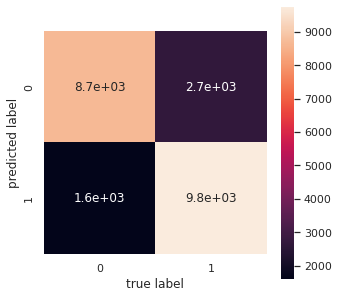

In [44]:
# Confusion matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize = (5,5))
sns.heatmap(cm, square=True, annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [45]:
# Classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80     11360
           1       0.78      0.86      0.82     11360

    accuracy                           0.81     22720
   macro avg       0.81      0.81      0.81     22720
weighted avg       0.81      0.81      0.81     22720



Model AUC score: 0.8106954225352113 




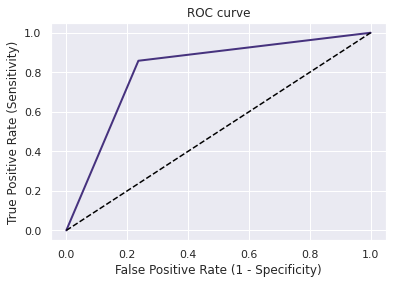

In [46]:
# AUC and ROC
print(f'Model AUC score: {roc_auc_score(y_test, preds)} \n\n')

fpr, tpr, thresholds = roc_curve(y_test, preds)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()


## **Visualiztion of Model**

In [47]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA


In [50]:
#ytt = y_train.to_numpy()

ytt = y_train.to_numpy().astype(np.integer)
pca = PCA(n_components = 2)
x_train2 = pca.fit_transform(x_train)
model.fit(x_train2,ytt)

SVC(C=10, gamma=0.5, kernel='linear', random_state=42)

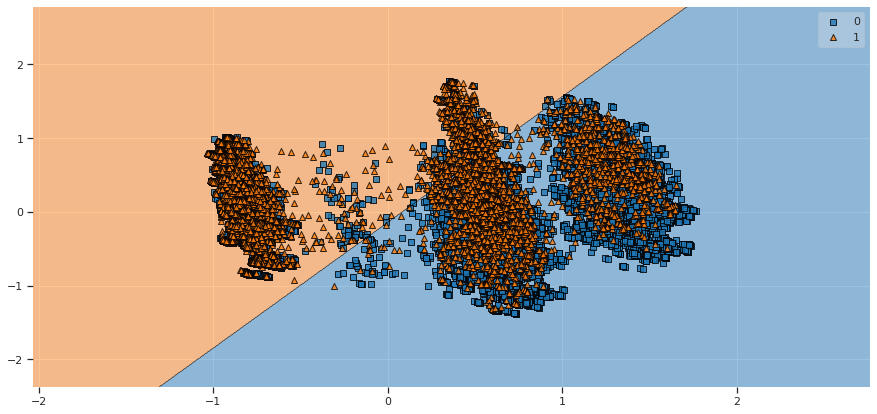

In [51]:
plt.figure(figsize=(15,7))
plot_decision_regions(x_train2,ytt, clf=model)
plt.show()
